In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,id,age,bp,sg,al,su,pcc,ba,bgr,bu,...,class,rbc_encoded,pc_encoded,pcc_encoded,ba_encoded,appet_encoded,class_encoded,rbc_normal,pc_normal,appet_poor
0,1,0.536232,0.666667,1.020,1.0,0,notpresent,notpresent,0.364286,0.333333,...,ckd,1,1,0,0,0,0,True,True,False
1,5,0.579710,0.666667,1.010,2.0,0,notpresent,notpresent,0.257143,0.205128,...,ckd,1,1,0,0,0,0,True,True,False
2,6,0.710145,1.000000,1.015,3.0,0,notpresent,notpresent,0.028571,0.192308,...,ckd,1,1,0,0,0,0,True,True,False
3,17,0.521739,0.333333,1.015,2.0,0,notpresent,notpresent,0.207143,0.461538,...,ckd,1,1,0,0,0,0,True,True,False
4,24,0.144928,0.333333,1.010,0.0,0,notpresent,notpresent,0.364286,0.410256,...,ckd,1,1,0,0,1,0,True,True,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             205 non-null    int64  
 1   age            205 non-null    float64
 2   bp             205 non-null    float64
 3   sg             205 non-null    float64
 4   al             205 non-null    float64
 5   su             205 non-null    int64  
 6   pcc            205 non-null    object 
 7   ba             205 non-null    object 
 8   bgr            205 non-null    float64
 9   bu             205 non-null    float64
 10  sc             205 non-null    float64
 11  sod            205 non-null    float64
 12  pot            205 non-null    float64
 13  hemo           205 non-null    float64
 14  pcv            205 non-null    float64
 15  wbcc           205 non-null    float64
 16  rbcc           205 non-null    float64
 17  htn            205 non-null    int64  
 18  dm        

In [6]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm,cad,pe,ane,rbc_encoded,pc_encoded,pcc_encoded,ba_encoded,appet_encoded,class_encoded
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000
mean,255.048780,0.546766,0.443902,1.019780,0.424390,0.073171,0.313554,0.317511,0.329617,0.508293,...,0.141463,0.004878,0.102439,0.024390,0.941463,0.917073,0.029268,0.004878,0.082927,0.64878
std,110.764047,0.239981,0.303792,0.004958,0.949918,0.395455,0.164280,0.170907,0.213656,0.241188,...,0.349352,0.069843,0.303967,0.154635,0.235330,0.276447,0.168970,0.069843,0.276447,0.47852
min,1.000000,0.000000,0.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,166.000000,0.362319,0.333333,1.020000,0.000000,0.000000,0.207143,0.192308,0.142857,0.400000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,283.000000,0.565217,0.333333,1.020000,0.000000,0.000000,0.328571,0.320513,0.333333,0.400000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000
75%,343.000000,0.724638,0.666667,1.025000,0.000000,0.000000,0.385714,0.448718,0.428571,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000
max,400.000000,1.000000,1.000000,1.025000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
print(data['class'].value_counts())

class
notckd    133
ckd        72
Name: count, dtype: int64


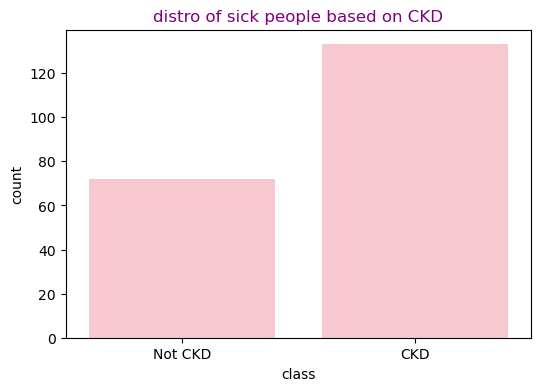

In [8]:
plt.figure( figsize = (6,4))
sns.countplot( x = 'class' , data = data , color = 'pink')
plt.xticks([0, 1], ['Not CKD', 'CKD'])
plt.title('distro of sick people based on CKD' , color = 'purple')
plt.show()

In [9]:
feature_to_analyze = ['age' , 'bp' , 'sg' , 'al' , 'su' , 'pcc' , 'ba' , 'bgr' , 'bu' , 'sc' , 'sod' , 'hemo' , 'pcv' , 'wbcc' , 'rbcc']

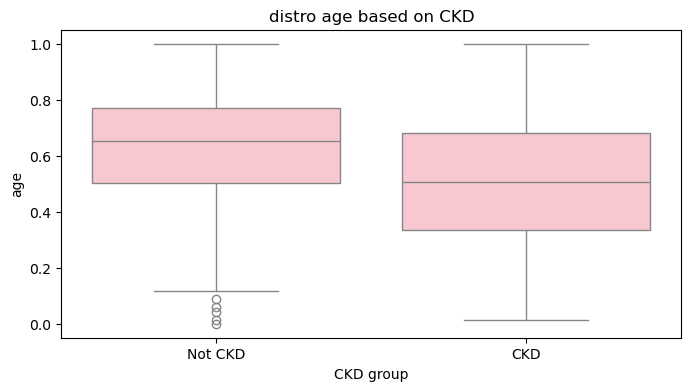

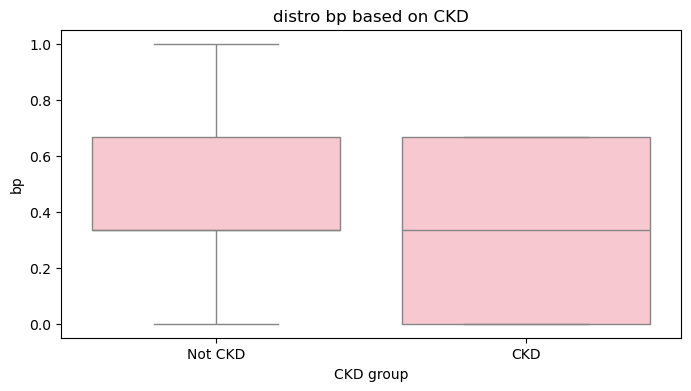

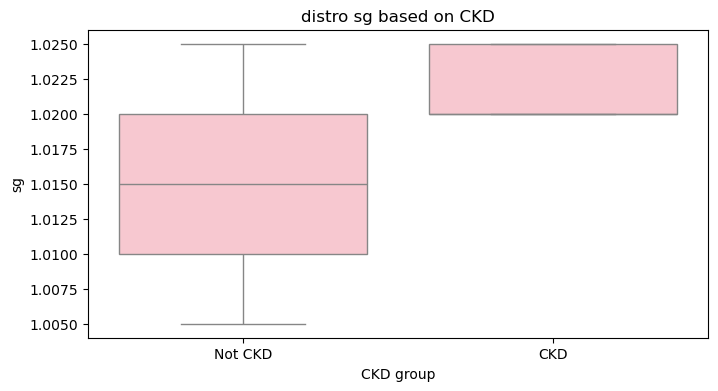

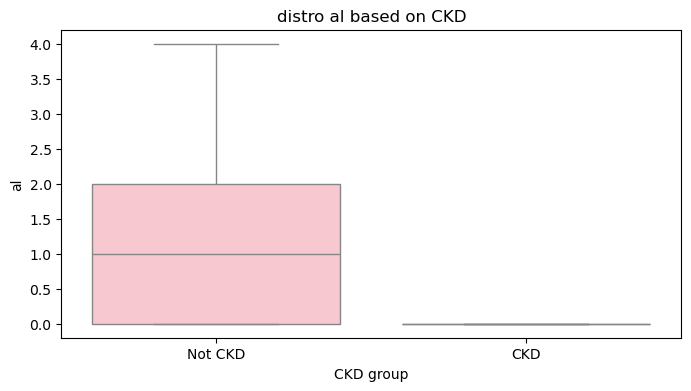

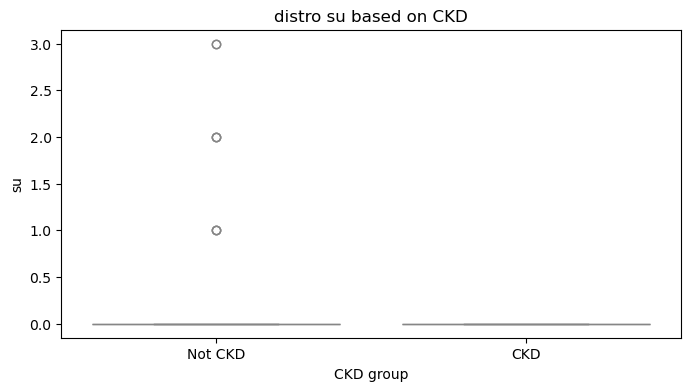

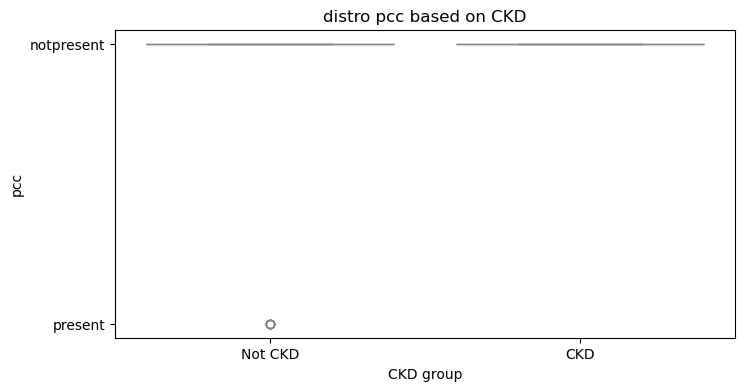

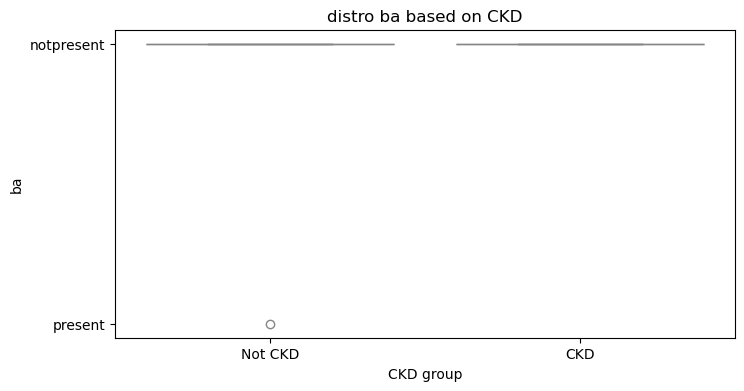

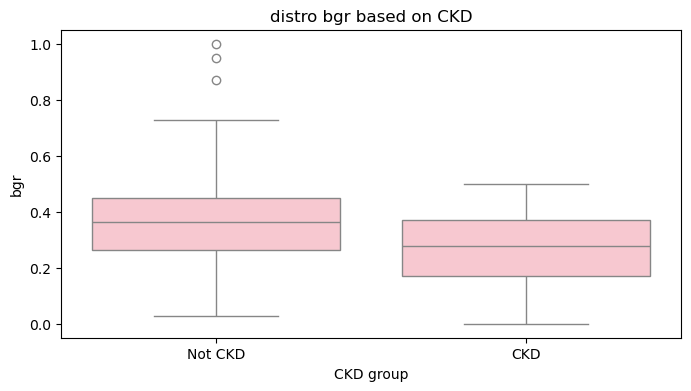

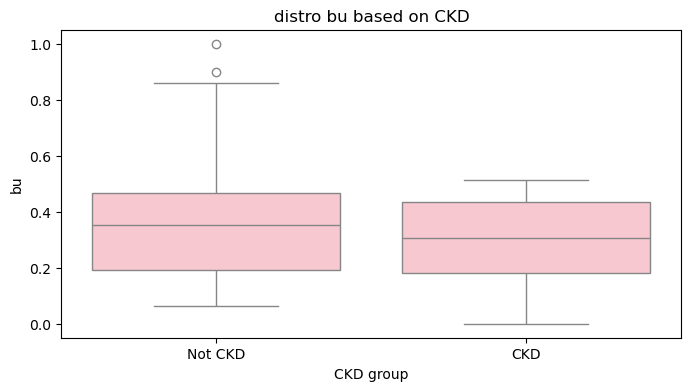

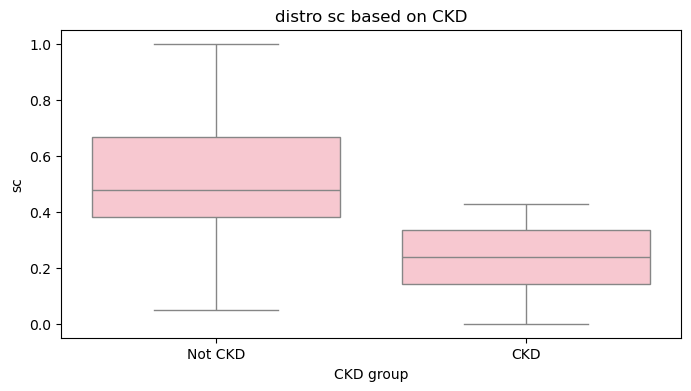

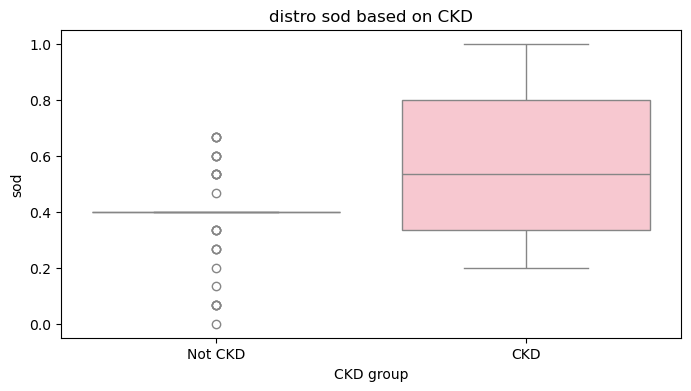

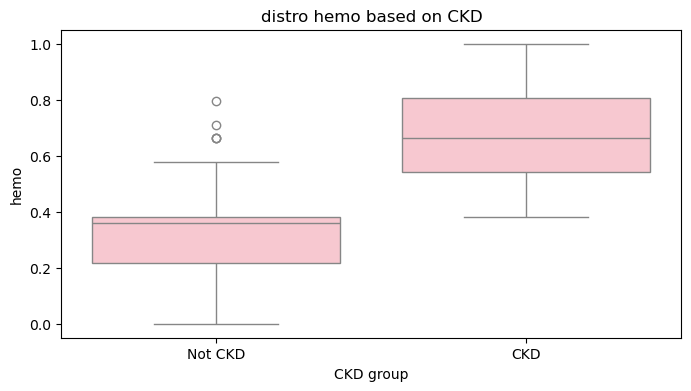

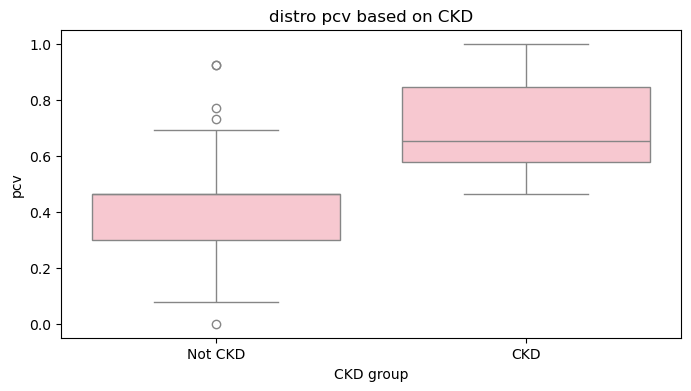

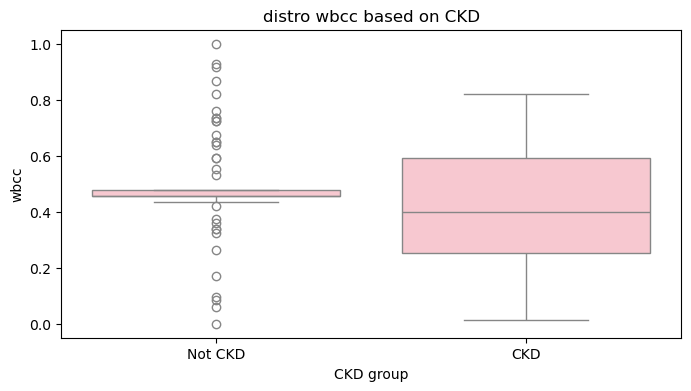

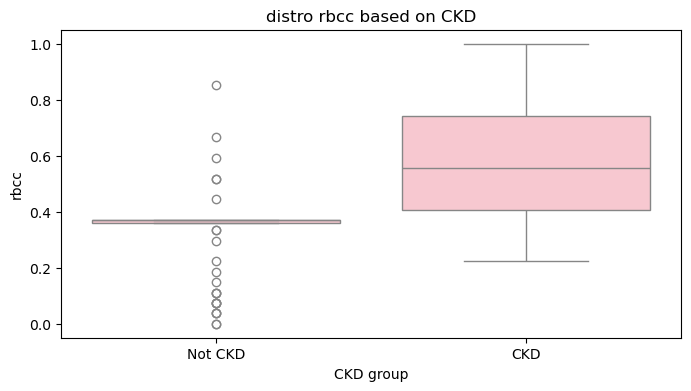

In [22]:
for col in feature_to_analyze:
    plt.figure( figsize = (8,4) )
    sns.boxplot( x = 'class' , y = col , data = data , color = 'pink')
    plt.title(f'distro {col} based on CKD' )  
    plt.xlabel('CKD group')
    plt.ylabel(col)
    plt.xticks([0,1] , ['Not CKD' , 'CKD'])
    plt.show()

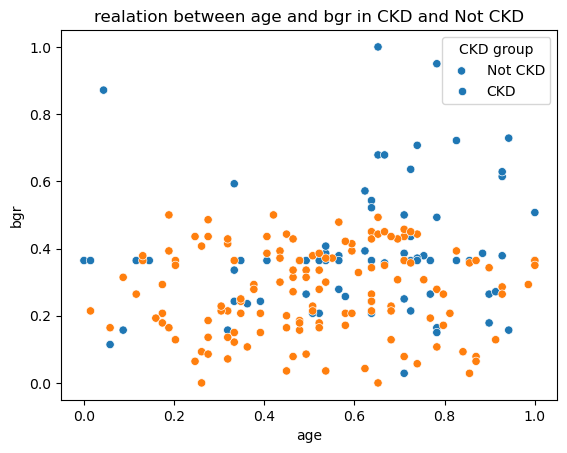

In [11]:
sns.scatterplot(x='age', y='bgr', hue='class', data=data)
plt.title('realation between age and bgr in CKD and Not CKD')
plt.xlabel('age')
plt.ylabel('bgr')
plt.legend(title='CKD group', labels=['Not CKD', 'CKD'])
plt.show()

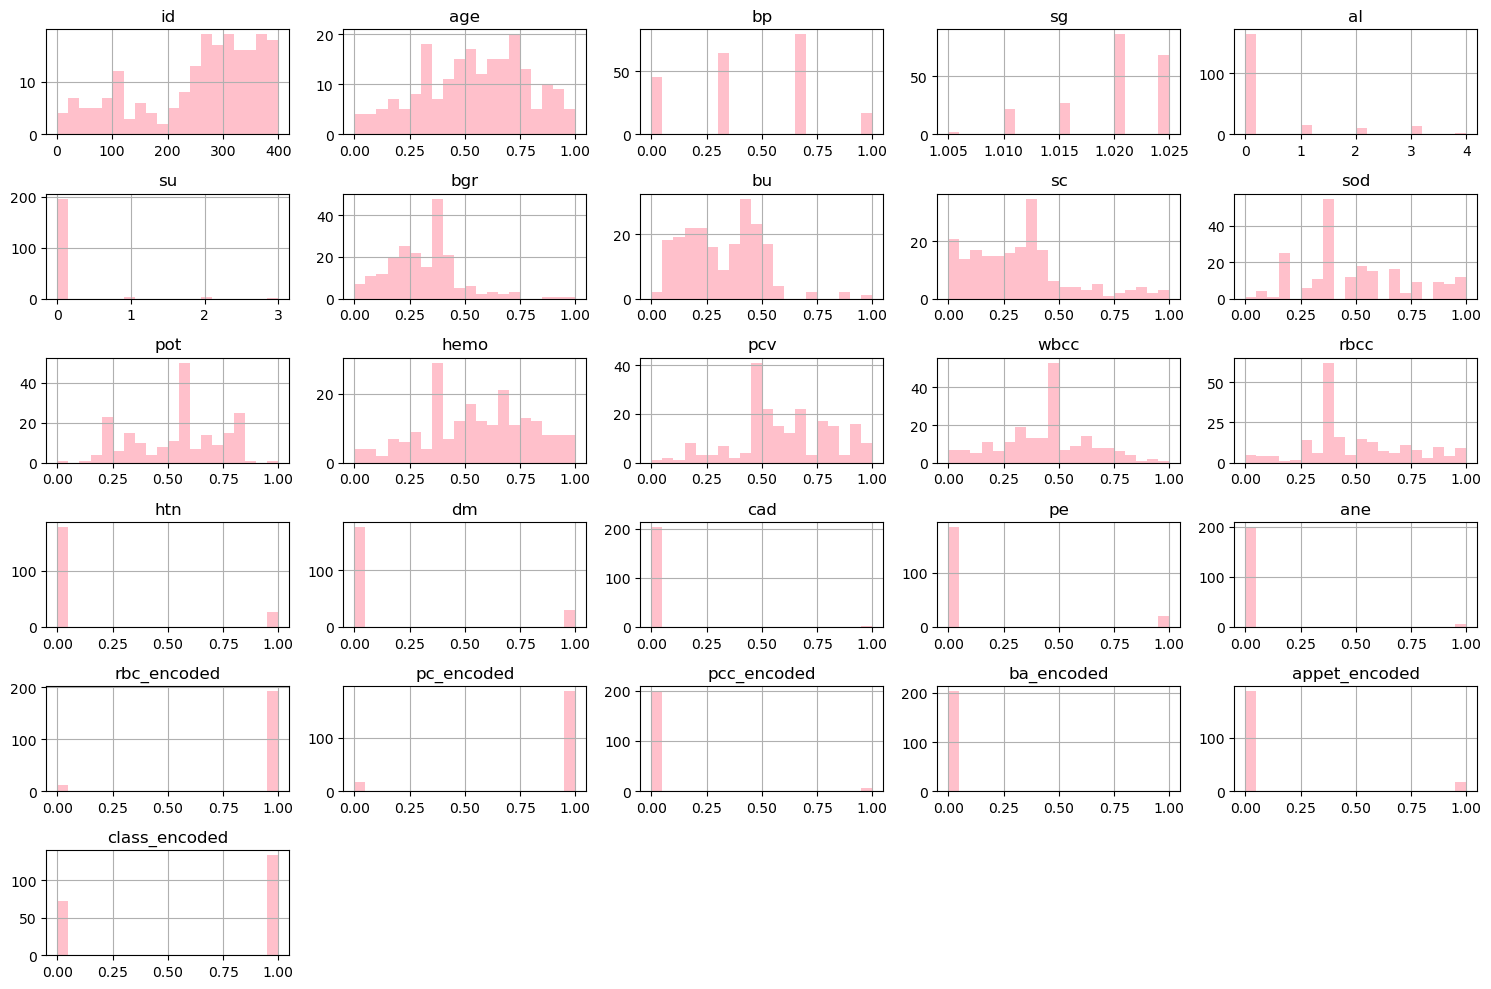

In [12]:
data.hist(bins=20, figsize=(15,10) , color = 'pink')
plt.tight_layout()
plt.show()

In [13]:
features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

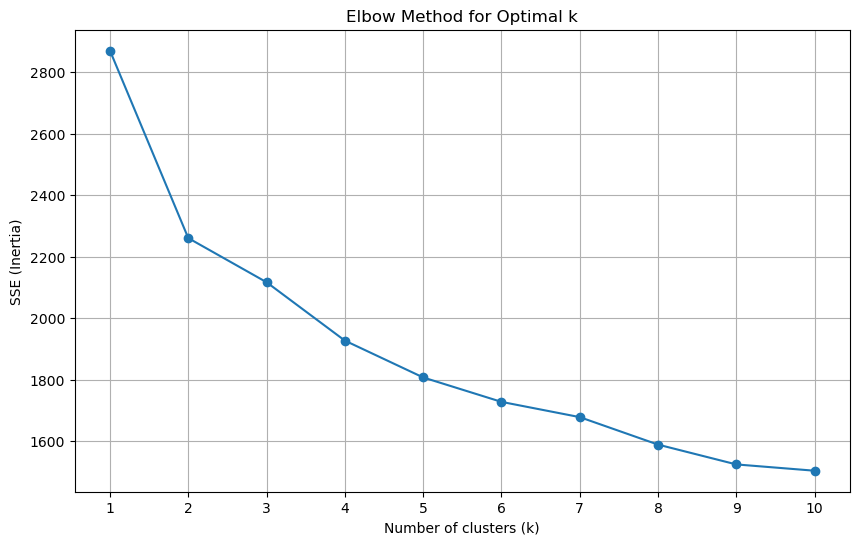

In [14]:
#Elbow
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid()
plt.show()

In [15]:
#k-means
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
labels_kmeans = kmeans.labels_

data['cluster_kmeans'] = labels_kmeans

silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"Silhouette Score for KMeans: {silhouette_kmeans:.3f}")

Silhouette Score for KMeans: 0.221


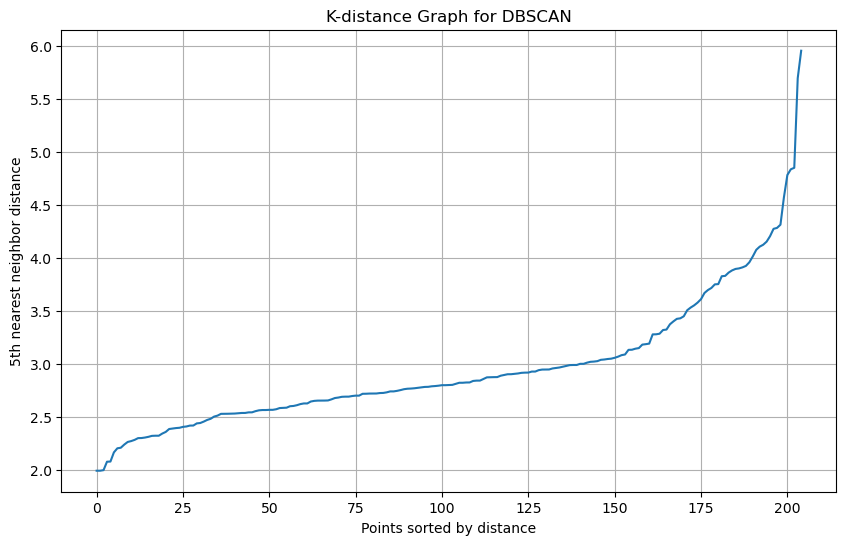

In [16]:
#k-distance
nn = NearestNeighbors(n_neighbors=5)
nn.fit(X_scaled)
distances, _ = nn.kneighbors(X_scaled)

distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('5th nearest neighbor distance')
plt.title('K-distance Graph for DBSCAN')
plt.grid()
plt.show()

In [17]:
#esp & min-sample
dbscan = DBSCAN(eps=2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)


data['cluster_dbscan'] = labels_dbscan


n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters_dbscan}")

#silhouotte with out noise
if n_clusters_dbscan > 1:
    valid_points = labels_dbscan != -1
    silhouette_dbscan = silhouette_score(X_scaled[valid_points], labels_dbscan[valid_points])
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.3f}")
else:
    print("Cannot compute Silhouette Score for DBSCAN with only one cluster")
    

Number of clusters found by DBSCAN: 1
Cannot compute Silhouette Score for DBSCAN with only one cluster


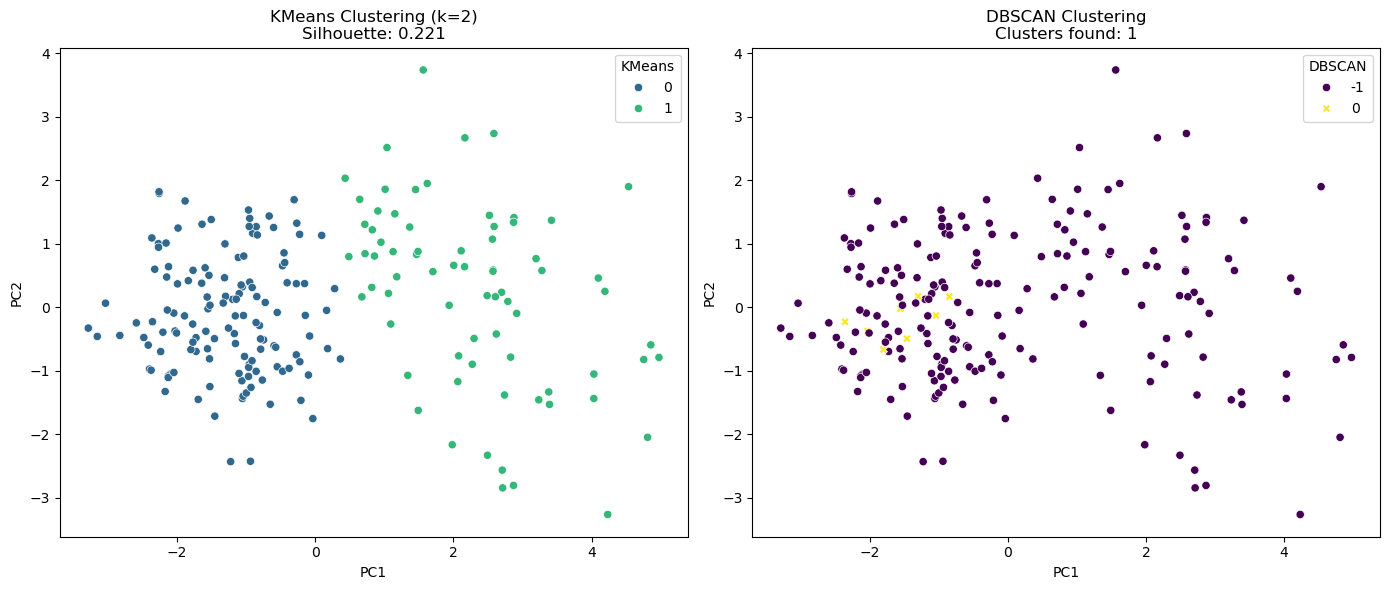

In [18]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame 
df_viz = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_viz['KMeans'] = labels_kmeans
df_viz['DBSCAN'] = labels_dbscan

# KMeans
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='KMeans', palette='viridis')
plt.title(f'KMeans Clustering (k={optimal_k})\nSilhouette: {silhouette_kmeans:.3f}')

# DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='DBSCAN', palette='viridis', style='DBSCAN')
plt.title(f'DBSCAN Clustering\nClusters found: {n_clusters_dbscan}')

plt.tight_layout()
plt.show()


In [19]:
# mean KMeans
print("\nMean features per KMeans cluster:")
print(data.groupby('cluster_kmeans')[features].mean())

# mean DBSCAN
if n_clusters_dbscan > 0:
    print("\nMean features per DBSCAN cluster:")
    print(data[data['cluster_dbscan'] != -1].groupby('cluster_dbscan')[features].mean())


Mean features per KMeans cluster:
                     age        bp        sg        al        su       bgr  \
cluster_kmeans                                                               
0               0.509223  0.393939  1.022386  0.007576  0.000000  0.267695   
1               0.614652  0.534247  1.015068  1.178082  0.205479  0.396477   

                      bu        sc       sod       pot      hemo       pcv  \
cluster_kmeans                                                               
0               0.302642  0.235931  0.576263  0.549825  0.685424  0.701923   
1               0.344398  0.499022  0.385388  0.518967  0.317627  0.400421   

                    wbcc      rbcc  
cluster_kmeans                      
0               0.404892  0.581930  
1               0.486549  0.329274  

Mean features per DBSCAN cluster:
                     age        bp      sg   al   su       bgr        bu  \
cluster_dbscan                                                             
0   

In [20]:

#Select three algorithms and explain choices
"""
Selected Algorithms:
1. Random Forest: Robust to noise, handles complex data, provides feature importance.
2. SVM: Effective for high-dimensional and non-linearly separable data.
3. Logistic Regression: Simple, interpretable, good baseline for binary classification.
"""


'\nSelected Algorithms:\n1. Random Forest: Robust to noise, handles complex data, provides feature importance.\n2. SVM: Effective for high-dimensional and non-linearly separable data.\n3. Logistic Regression: Simple, interpretable, good baseline for binary classification.\n'


5-Fold Cross-Validation Results (Mean F1-Score):
Random Forest: 0.985
SVM: 0.981
Logistic Regression: 0.981

Model Evaluation (Accuracy, Precision, Recall, F1-Score):
                     Accuracy  Precision    Recall  F1-Score
Random Forest        0.967742   0.976190  0.976190  0.976190
SVM                  0.983871   0.976744  1.000000  0.988235
Logistic Regression  0.967742   1.000000  0.952381  0.975610

Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.989

Best Parameters for SVM:
{'C': 10, 'kernel': 'rbf'}
Best F1 Score: 0.995

Best Parameters for Logistic Regression:
{'C': 0.1, 'solver': 'lbfgs'}
Best F1 Score: 0.995

Tuned Model Evaluation:
                             Accuracy  Precision    Recall  F1-Score
Random Forest                0.967742   0.976190  0.976190  0.976190
SVM                          0.983871   0.976744  1.000000  0.988235
Logistic Regression          0.967742   1.000000  0.952381  0.97561

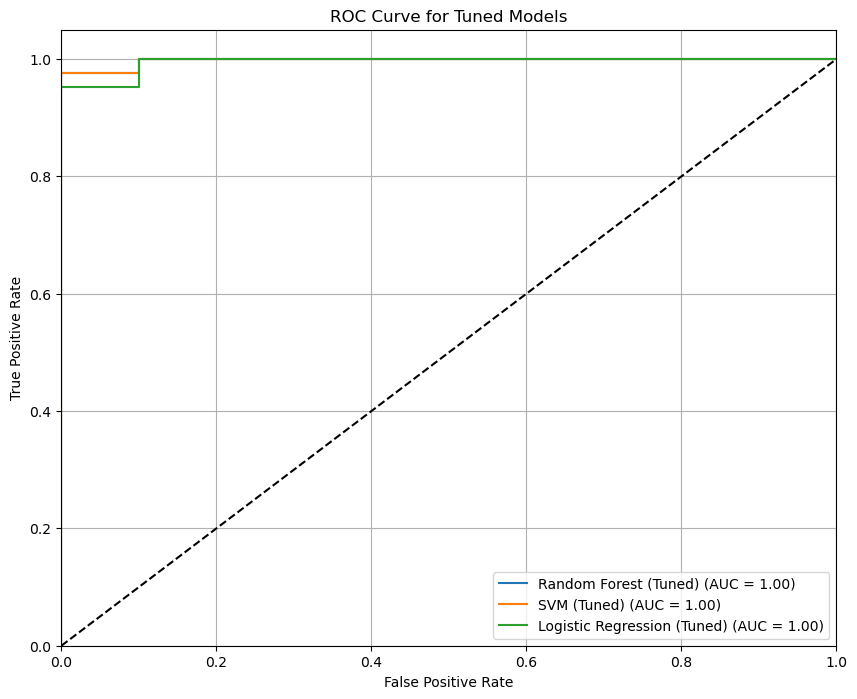

In [21]:
#Define and train three models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

y = data['class_encoded']


#Split into train (70%) and test (30%) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


#5-Fold Cross-Validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
    cv_results[name] = scores.mean()


# Print 5-Fold Cross-Validation results
print("\n5-Fold Cross-Validation Results (Mean F1-Score):")
for name, score in cv_results.items():
    print(f"{name}: {score:.3f}")


# Part e: Evaluate models using Accuracy, Precision, Recall, and F1-Score
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1-Score': f1_score(y_test, y_pred, average='binary')
    }

# Print evaluation results
print("\nModel Evaluation (Accuracy, Precision, Recall, F1-Score):")
results_df = pd.DataFrame(results).T
print(results_df)

# Part f: Hyperparameter tuning for each model
# Random Forest tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("\nBest Parameters for Random Forest:")
print(rf_grid.best_params_)
print(f"Best F1 Score: {rf_grid.best_score_:.3f}")

# SVM tuning
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_param_grid, cv=5, scoring='f1', n_jobs=-1)
svm_grid.fit(X_train, y_train)
print("\nBest Parameters for SVM:")
print(svm_grid.best_params_)
print(f"Best F1 Score: {svm_grid.best_score_:.3f}")

# Logistic Regression tuning
lr_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_param_grid, cv=5, scoring='f1', n_jobs=-1)
lr_grid.fit(X_train, y_train)
print("\nBest Parameters for Logistic Regression:")
print(lr_grid.best_params_)
print(f"Best F1 Score: {lr_grid.best_score_:.3f}")

# Update models with best parameters
models_tuned = {
    'Random Forest (Tuned)': rf_grid.best_estimator_,
    'SVM (Tuned)': svm_grid.best_estimator_,
    'Logistic Regression (Tuned)': lr_grid.best_estimator_
}

# Evaluate tuned models
for name, model in models_tuned.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1-Score': f1_score(y_test, y_pred, average='binary')
    }

# Print evaluation results for tuned models
print("\nTuned Model Evaluation:")
results_df_tuned = pd.DataFrame(results).T
print(results_df_tuned)


# Part g: Compare models and plot ROC curves
plt.figure(figsize=(10, 8))
for name, model in models_tuned.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)  # استفاده از تابع auc
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()
